In [1]:
!pip install -q cvzone
!pip install -q ultralytics

In [3]:
import numpy as np
import pandas as pd 
import os
import random
import cv2
import matplotlib.pyplot as plt
import cvzone
import ultralytics
from ultralytics import YOLO

In [3]:
ultralytics.checks()

Ultralytics YOLOv8.1.20 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)


In [4]:
ultralytics.__version__

'8.1.20'

In [5]:
labels = ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']

In [6]:
def show_random_image():
    IMG_DIR_PATH = r"/kaggle/input/aquarium-data-cots/aquarium_pretrain/train/images"
    LABEL_DIR_PATH = r"/kaggle/input/aquarium-data-cots/aquarium_pretrain/train/labels"
    rand_img = random.choice(os.listdir(IMG_DIR_PATH))
    rand_label_file = rand_img.replace(".jpg", ".txt")
    img = cv2.imread(os.path.join(IMG_DIR_PATH, rand_img))
    height = img.shape[0]
    width = img.shape[1]
    print(width, height)
    with open(os.path.join(LABEL_DIR_PATH, rand_label_file), "r") as f:
        for line in f.readlines():
            line = line.split()
            label, x, y, w, h = [float(i) for i in line]
            x_center = (x * width)
            y_center = (y * height)
            x1 = int(x_center - ((w * width)/2))
            y1 = int(y_center - ((h * height)/2))
            x2 = int(x_center + ((w * width)/2))
            y2 = int(y_center + ((h * height)/2))
            img = cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), thickness = 3 )
            cvzone.putTextRect(img, labels[int(label)], (x1, y1-10), scale = 2)
    plt.imshow(img)
    plt.axis('off')


768 1024


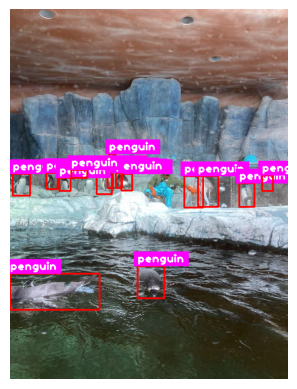

In [7]:
show_random_image()

## Train YOLO model

In [8]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:00<00:00, 70.8MB/s]


#### Writing to the `data.yaml` file

In [9]:
%%writefile /kaggle/working/data.yaml
train: /kaggle/input/aquarium-data-cots/aquarium_pretrain/train/images
test: /kaggle/input/aquarium-data-cots/aquarium_pretrain/test/images
val: /kaggle/input/aquarium-data-cots/aquarium_pretrain/valid/images

nc: 7
names: ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']

Writing /kaggle/working/data.yaml


### Train the model

In [10]:
!yolo mode=train model="/kaggle/working/yolov8n.pt" data="/kaggle/working/data.yaml" imgsz = 1024

Ultralytics YOLOv8.1.20 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolov8n.pt, data=/kaggle/working/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=

In [11]:
!yolo mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" source="/kaggle/input/aquarium-data-cots/aquarium_pretrain/train/images/IMG_2282_jpeg_jpg.rf.510f3bc14c3e0aa378b192199d01cae6.jpg" imgsz = 1024

Ultralytics YOLOv8.1.20 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /kaggle/input/aquarium-data-cots/aquarium_pretrain/train/images/IMG_2282_jpeg_jpg.rf.510f3bc14c3e0aa378b192199d01cae6.jpg: 1024x768 1 puffin, 65.6ms
Speed: 4.5ms preprocess, 65.6ms inference, 537.2ms postprocess per image at shape (1, 3, 1024, 768)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


### Prediction

In [15]:
!yolo mode=predict model="/kaggle/working/runs/detect/train/weights/best.pt" source="/kaggle/input/aquarium-data-cots/aquarium_pretrain/test/images/IMG_2395_jpeg_jpg.rf.9f1503ad3b7a7c7938daed057cc4e9bc.jpg" imgsz = 1024

Ultralytics YOLOv8.1.20 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007013 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /kaggle/input/aquarium-data-cots/aquarium_pretrain/test/images/IMG_2395_jpeg_jpg.rf.9f1503ad3b7a7c7938daed057cc4e9bc.jpg: 1024x768 8 fishs, 67.0ms
Speed: 4.0ms preprocess, 67.0ms inference, 487.6ms postprocess per image at shape (1, 3, 1024, 768)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


### Model performance

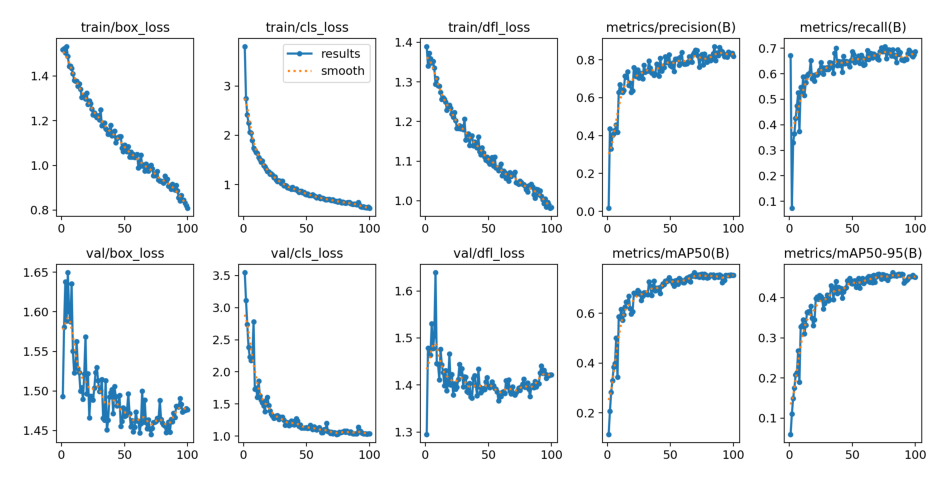

In [19]:
plt.figure(figsize=(12, 8))
results = cv2.imread("results.png")
results = cv2.cvtColor(results, cv2.COLOR_BGR2RGB)
plt.imshow(results)
plt.axis('off');

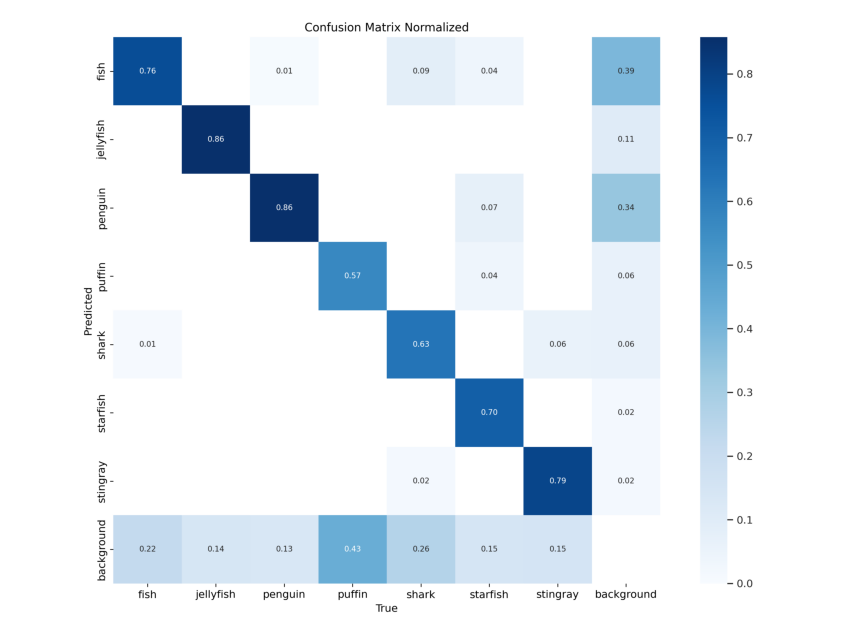

In [21]:
plt.figure(figsize=(12, 8))
conf_matrix = cv2.imread("confusion_matrix_normalized.png")
conf_matrix = cv2.cvtColor(conf_matrix, cv2.COLOR_BGR2RGB)
plt.imshow(conf_matrix)
plt.axis('off');